# Reading and Undersatnding Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

pd.options.display.max_columns = None

#### Reading file

In [3]:
telecom = pd.read_csv('telecom_churn_data.csv' )
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom.shape

(99999, 226)

In [5]:
# missing values
pd.options.display.max_rows= None
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [6]:
# Derive Total recharge data amt
telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]  * telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]  * telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]  * telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]  * telecom['av_rech_amt_data_9']

In [7]:
# dropping features after deriving varibale
drop_total_rech_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                     'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']      
telecom.drop(drop_total_rech_cols, axis=1, inplace=True)

In [8]:
# checking shape after dropping
telecom.shape

(99999, 222)

In [9]:
#  imputing fb_user_X and Night_Pack_user with zero because NA implies that they are not using the facility
cols=['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
     'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']
telecom[cols]=telecom[cols].fillna(0)
print("Imputed fb_user_X ,night_pck_user_X with 0 as null values means the user has not used it")

Imputed fb_user_X ,night_pck_user_X with 0 as null values means the user has not used it


In [10]:
# checking null again after imputing
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
telecom['arpu_3g_7']

0         212.17
1           0.00
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8           0.00
9           0.00
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19          0.66
20           NaN
21           NaN
22           NaN
23        306.57
24           NaN
25           NaN
26          0.00
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32          0.00
33       2294.03
34         35.00
35           NaN
36           NaN
37           NaN
38           NaN
39          0.00
40        213.08
41           NaN
42           NaN
43           NaN
44          0.01
45           NaN
46           NaN
47           NaN
48           NaN
49           NaN
50           NaN
51           NaN
52           NaN
53          0.00
54           NaN
55          0.00
56         15.15
57        559.25
58           N

In [12]:
# dropping as thsese columns are highly skewed
telecom.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'],axis=1,inplace=True)

In [13]:
# chcking shape
telecom.shape

(99999, 206)

In [14]:
telecom['loc_ic_t2o_mou'].value_counts(dropna=False)

0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64

We can see that all the values in 'loc_og_t2o_mou','std_og_t2o_mou' and 'loc_ic_t2o_mou' are 0.0 hence we can drop these. 

In [15]:
telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1, inplace= True)

In [16]:
telecom.shape

(99999, 203)

In [17]:
telecom['circle_id'].value_counts(dropna=False)

109    99999
Name: circle_id, dtype: int64

We can see that 'circle_id' is same for all rows hence we can drop it

In [18]:
telecom.drop('circle_id',axis=1, inplace=True)

In [19]:
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number                0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou

In [20]:
telecom.shape

(99999, 202)

# Filter High Value Customers 

In [21]:
telecom['total_avg_rech_amnt_6_7'] = (telecom["total_rech_amt_6"].fillna(0) + telecom["total_rech_data_amt_6"].fillna(0) + 
telecom["total_rech_amt_7"].fillna(0) + telecom["total_rech_data_amt_7"].fillna(0))/2.0

In [22]:
# Calculate the 70th percentile
x=telecom['total_avg_rech_amnt_6_7'].quantile(0.7)
x

478.0

Filter those customers whose recharge amount is more than 70th percentile of averege recharge amount of month 6 and 7

In [23]:
telecom['HVC']= np.where(telecom['total_avg_rech_amnt_6_7']>x,1,0)

In [24]:
# getting HVC customers only.
telecom=telecom.loc[telecom['HVC'] == 1]
telecom.shape

(29953, 204)

In [25]:
#now lets drop 'HVC' column
telecom.drop('HVC',axis=1, inplace=True)

In [26]:
telecom.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0      7000842753            6/30/2014            7/31/2014   
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
21     7002124215            6/30/2014            7/31/2014   
23     7000887461            6/30/2014            7/31/2014   

   last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0             8/31/2014            9/30/2014   197.385   214.816   213.803   
7             8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8             8/31/2014            9/30/2014   378.721   492.223   137.362   
21            8/31/2014            9/30/2014   514.453   597.753   637.760   
23            8/31/2014            9/30/2014    74.350   193.897   366.966   

     arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0    21.100          NaN          NaN         0.00          NaN           NaN   
7   500.000        57.84        54.68        52.29          NaN        453.43   
8   166.787       413.69       351.03        35.08        33.46         94.66   
21  578.596       102.41       132.11        85.14       161.63        757.93   
23  811.480        48.96        50.66        33.58        15.74         85.41   

    offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN          0.00           NaN            NaN            NaN   
7         567.16        325.91           NaN          16.23          33.49   
8          80.63        136.48        108.71           0.00           0.00   
21        896.68        983.39        869.89           0.00           0.00   
23         89.36        205.89        111.88           0.00           0.00   

    roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN            NaN           0.00   
7           31.64            NaN          23.74          12.59          38.06   
8            0.00            0.0           0.00           0.00           0.00   
21           0.00            0.0           0.00           0.00           0.00   
23           0.00            0.0           0.00           0.00           0.00   

    roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0             NaN               NaN               NaN              0.00   
7             NaN             51.39             31.38             40.28   
8             0.0            297.13            217.59             12.49   
21            0.0              4.48              6.16             23.34   
23            0.0             48.96             50.66             33.58   

    loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN            308.63            447.38            162.28   
8              26.13             80.96             70.58             50.54   
21             29.98             91.81             87.93            104.81   
23             15.74             82.94             83.01            148.56   

    loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN             62.13             55.14             53.23   
8              34.58              0.00              0.00              0.00   
21            107.54              0.75              0.00              1.58   
23             83.73              0.00              0.00              0.00   

    loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21          

In [27]:
date_columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
              'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom.drop(columns=date_columns,axis=1,inplace=True)

In [28]:
telecom.shape

(29953, 191)

# Churn Tag

In [29]:
telecom['churn'] = np.where(telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,0)

In [30]:
telecom['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [31]:
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04    

In [32]:
# getting _9 columns
drop_cols_9 = [col for col in telecom.columns if '_9' in col]
print(drop_cols_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


In [33]:
#dropping churn phase variables
telecom.drop(drop_cols_9,axis=1,inplace=True)
telecom.shape

(29953, 146)

In [34]:
# This is also 9th month data
telecom.drop('sep_vbc_3g',axis=1,inplace=True)

In [35]:
telecom.corr()

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number                 1.000000  0.033830  0.029606  0.034434   
arpu_6                        0.033830  1.000000  0.671846  0.612987   
arpu_7                        0.029606  0.671846  1.000000  0.759924   
arpu_8                        0.034434  0.612987  0.759924  1.000000   
onnet_mou_6                   0.008271  0.339400  0.212600  0.150980   
onnet_mou_7                   0.003400  0.221270  0.317038  0.230247   
onnet_mou_8                   0.004811  0.197779  0.266026  0.337751   
offnet_mou_6                  0.019833  0.507177  0.354877  0.279812   
offnet_mou_7                  0.009907  0.348804  0.486995  0.373819   
offnet_mou_8                  0.015508  0.303685  0.392598  0.514708   
roam_ic_mou_6                 0.010008  0.125499  0.092705  0.087876   
roam_ic_mou_7                -0.003306  0.085370  0.092344  0.076615   
roam_ic_mou_8                 0.003899  0.094946  0.092229  0.106982   
roam_og_mou_6                 0.004907  0.195160  0.134156  0.128569   
roam_og_mou_7                -0.002499  0.146626  0.178838  0.140528   
roam_og_mou_8                -0.004480  0.131160  0.151039  0.196213   
loc_og_t2t_mou_6              0.046873  0.164389  0.106460  0.100468   
loc_og_t2t_mou_7              0.044117  0.130434  0.154677  0.130457   
loc_og_t2t_mou_8              0.043196  0.130620  0.131060  0.170296   
loc_og_t2m_mou_6              0.078337  0.328522  0.216195  0.211743   
loc_og_t2m_mou_7              0.074650  0.251398  0.298199  0.262720   
loc_og_t2m_mou_8              0.078313  0.232206  0.249674  0.339076   
loc_og_t2f_mou_6              0.051168  0.137246  0.112254  0.120624   
loc_og_t2f_mou_7              0.051805  0.116927  0.138398  0.133177   
loc_og_t2f_mou_8              0.055425  0.110099  0.118125  0.152710   
loc_og_t2c_mou_6             -0.013092  0.044906  0.008194  0.000926   
loc_og_t2c_mou_7             -0.015662  0.010522  0.037998  0.019436   
loc_og_t2c_mou_8             -0.008111  0.014085  0.028761  0.049958   
loc_og_mou_6                  0.083230  0.324981  0.214107  0.208020   
loc_og_mou_7                  0.079433  0.252468  0.299426  0.260722   
loc_og_mou_8                  0.080553  0.237513  0.249455  0.333516   
std_og_t2t_mou_6             -0.018179  0.271817  0.167427  0.102092   
std_og_t2t_mou_7             -0.021918  0.165154  0.257906  0.176012   
std_og_t2t_mou_8             -0.018376  0.141329  0.216696  0.272332   
std_og_t2m_mou_6             -0.027019  0.299406  0.204989  0.120645   
std_og_t2m_mou_7             -0.030859  0.185871  0.305250  0.204601   
std_og_t2m_mou_8             -0.028118  0.148217  0.236231  0.317780   
std_og_t2f_mou_6              0.025802  0.065432  0.051672  0.055365   
std_og_t2f_mou_7              0.017759  0.054678  0.069380  0.067088   
std_og_t2f_mou_8              0.021523  0.046339  0.051805  0.067262   
std_og_t2c_mou_6                   NaN       NaN       NaN       NaN   
std_og_t2c_mou_7                   NaN       NaN       NaN       NaN   
std_og_t2c_mou_8                   NaN       NaN       NaN       NaN   
std_og_mou_6                 -0.029749  0.383363  0.250198  0.150108   
std_og_mou_7                 -0.035029  0.236125  0.378581  0.256245   
std_og_mou_8                 -0.030565  0.193116  0.301791  0.393378   
isd_og_mou_6                 -0.003533  0.470711  0.421563  0.398444   
isd_og_mou_7                 -0.003211  0.430778  0.512616  0.440880   
isd_og_mou_8                 -0.004171  0.431703  0.458751  0.461849   
spl_og_mou_6                 -0.019952  0.119749  0.066655  0.099284   
spl_og_mou_7                 -0.022746  0.070297  0.111769  0.122624   
spl_og_mou_8                 -0.015749  0.048384  0.065356  0.099142   
og_others_6                  -0.007289  0.053247  0.017445  0.012402   
og_others_7                  -0.001002  0.024909  0.026093  0.015709   
og_others_8                   0.000492  0.016221  0.017799  0.011

In [36]:
telecom['std_og_t2c_mou_6'].value_counts(normalize=True,dropna=False)

0.0    0.981905
NaN    0.018095
Name: std_og_t2c_mou_6, dtype: float64

In [37]:
telecom['std_og_t2c_mou_7'].value_counts(normalize=True,dropna=False)

0.0    0.982105
NaN    0.017895
Name: std_og_t2c_mou_7, dtype: float64

In [38]:
telecom['std_og_t2c_mou_8'].value_counts(normalize=True,dropna=False)

0.0    0.960872
NaN    0.039128
Name: std_og_t2c_mou_8, dtype: float64

These columns doesn't show any correlation with churn variable and are highly skewed,hence we can drop these.

In [39]:
telecom.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)

# EDA

In [40]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",showfliers=False)
    plt.show()

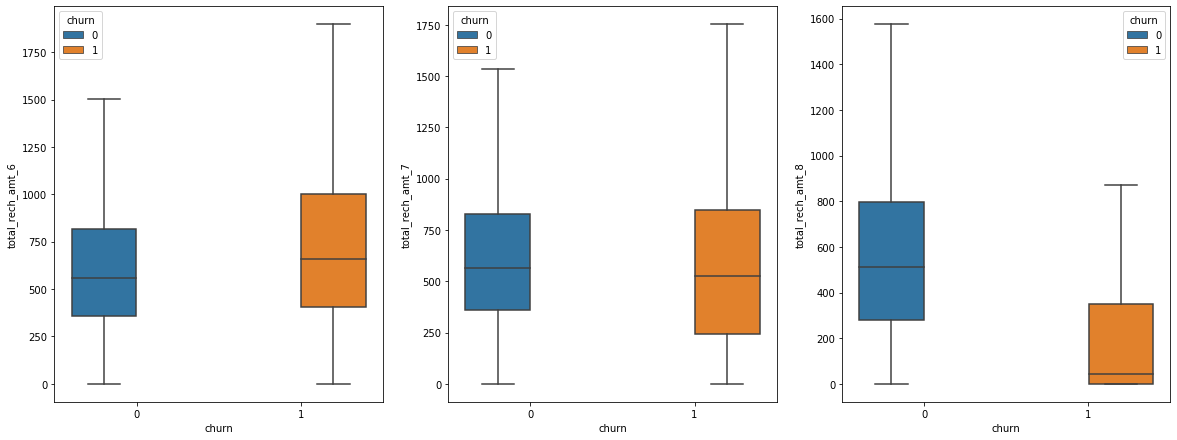

In [41]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

we can see that total recharge amt is reduced for churn customer in action phase.

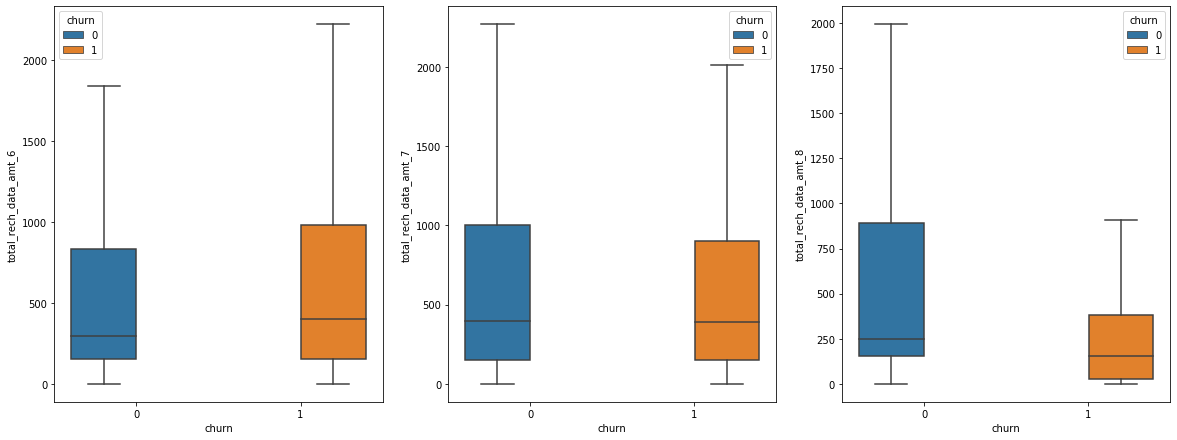

In [42]:

plot_box_chart('total_rech_data_amt')

total_rech_data_amt also got reduced for the customers who churned in 8th month

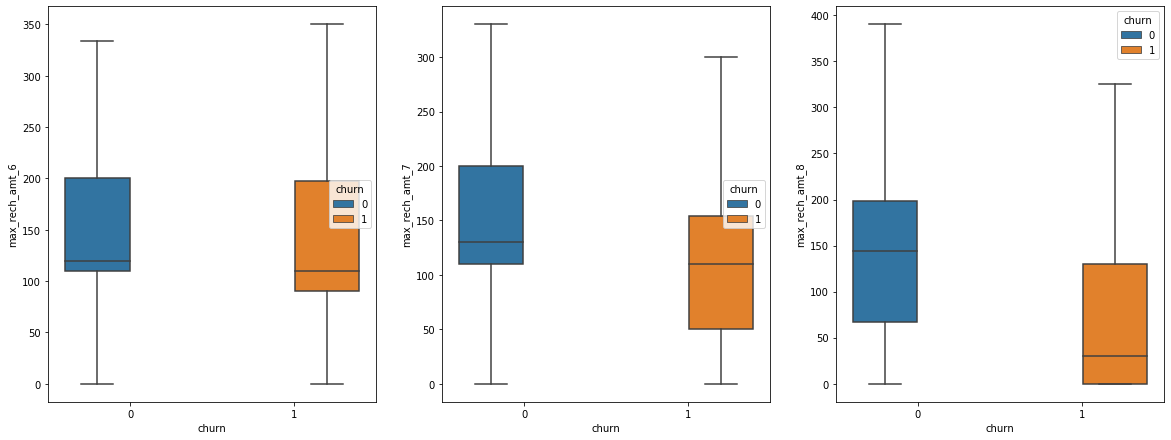

In [43]:
plot_box_chart('max_rech_amt')

Here Max_rech_amt is dropped for churned customers in 8th month.

In [44]:
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16740.000000     17038.000000     15935.000000
mean        139.804002       140.444712       136.353373
std         118.892926       120.295284       119.571138
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [45]:
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

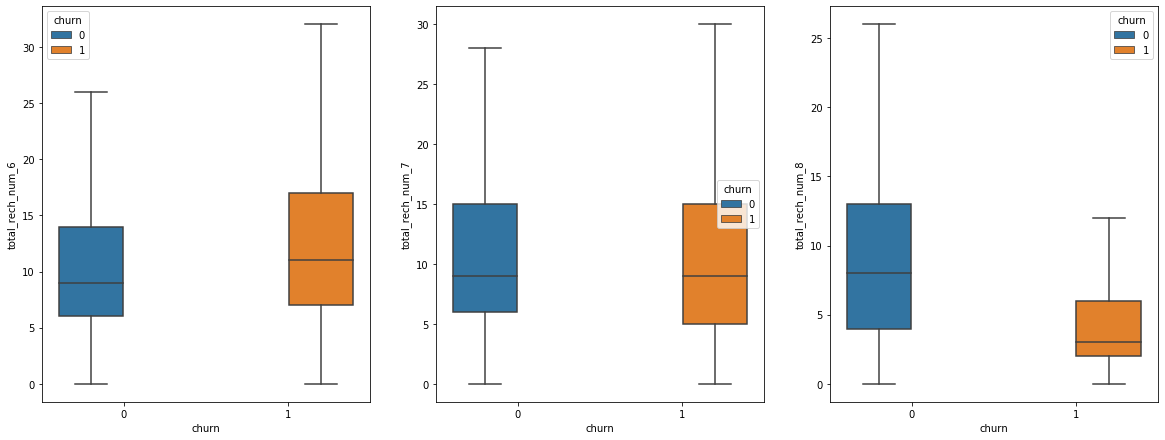

In [46]:
plot_box_chart('total_rech_num')

The customer who have churned ,total_rech_num got reduced for them in 8 month.

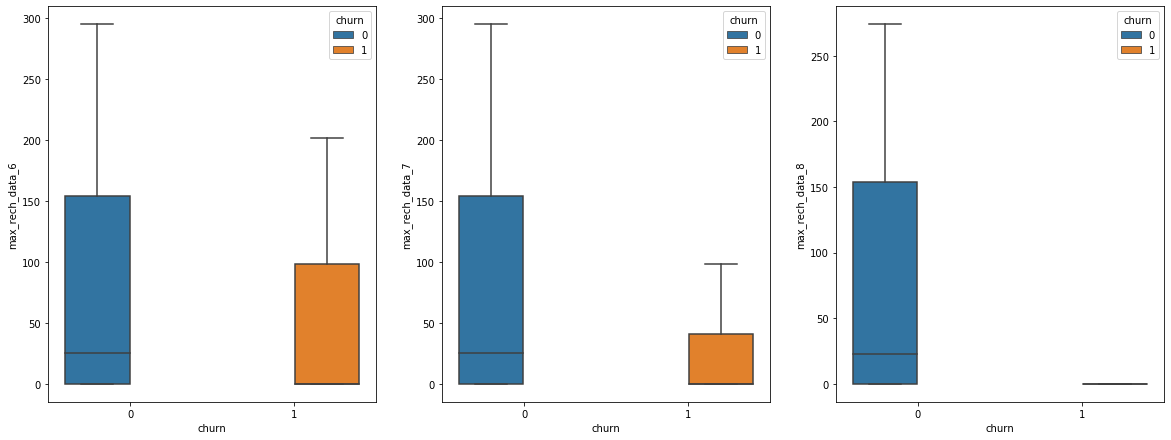

In [47]:
plot_box_chart('max_rech_data')

we can see that max_rech_data is almost 0 for churned customers,which means that the customers who churned stopped recharging in 8th month.

In [48]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom.columns[telecom.columns.str.contains('day')]
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

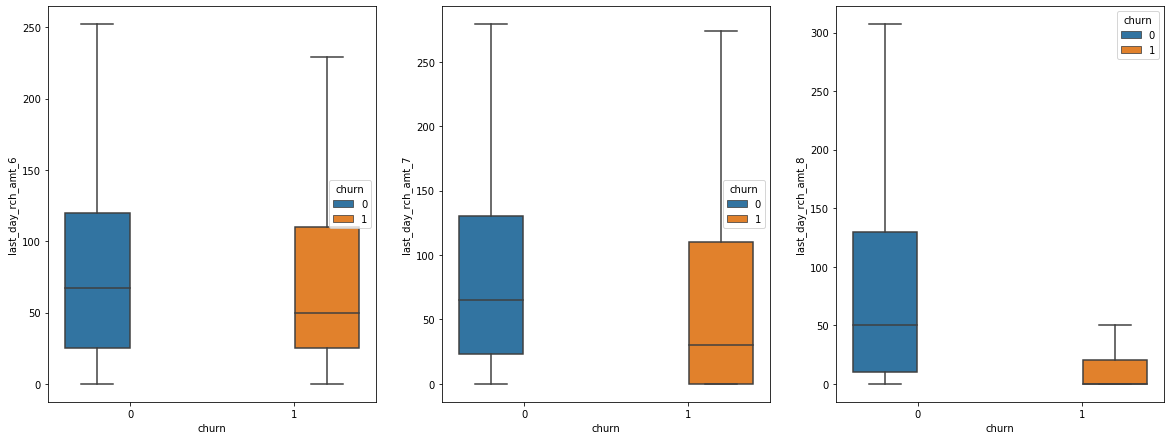

In [49]:
plot_box_chart('last_day_rch_amt')

 We are getting a huge drop in 8th month recharge amount for churned customers.

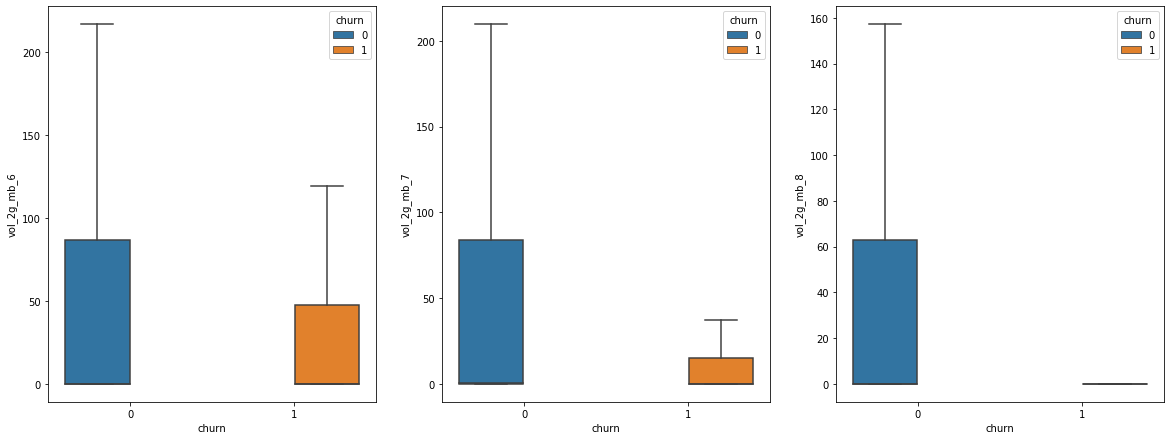

In [50]:
plot_box_chart('vol_2g_mb')

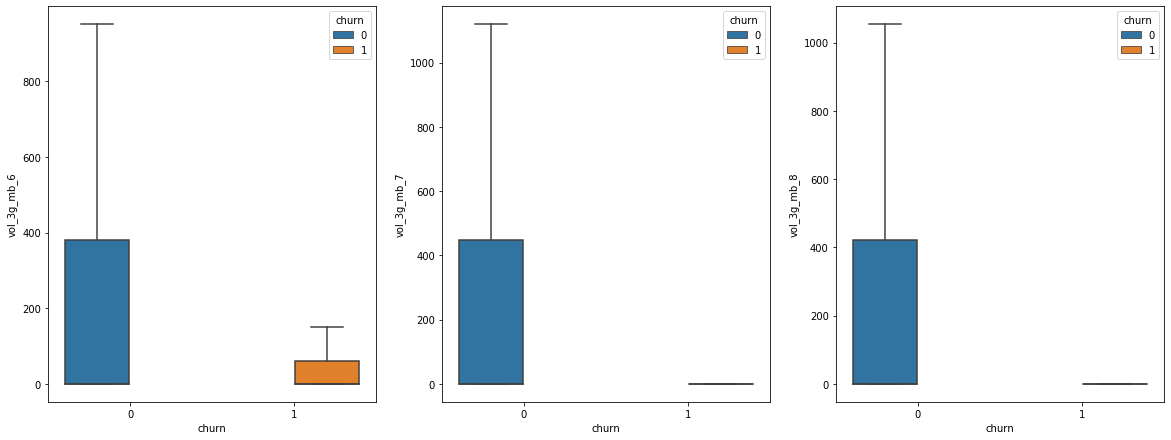

In [51]:
plot_box_chart('vol_3g_mb')

2G and 3G usage for churned customers drops in 8th month

### minute of usage - voice calls

In [52]:
mou_cols = telecom.columns[telecom.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [53]:
miss_mou_df=(telecom[mou_cols].isnull().sum()/len(telecom[mou_cols]) * 100)
miss_mou_df.sort_values(ascending=False)

isd_ic_mou_8        3.912797
std_ic_t2t_mou_8    3.912797
loc_ic_t2f_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
loc_ic_t2t_mou_8    3.912797
spl_og_mou_8        3.912797
std_og_mou_8        3.912797
std_og_t2f_mou_8    3.912797
std_og_t2m_mou_8    3.912797
std_og_t2t_mou_8    3.912797
loc_og_mou_8        3.912797
loc_og_t2c_mou_8    3.912797
loc_og_t2f_mou_8    3.912797
loc_og_t2m_mou_8    3.912797
loc_og_t2t_mou_8    3.912797
roam_og_mou_8       3.912797
roam_ic_mou_8       3.912797
offnet_mou_8        3.912797
onnet_mou_8         3.912797
loc_ic_mou_8        3.912797
isd_og_mou_8        3.912797
std_ic_mou_8        3.912797
spl_ic_mou_8        3.912797
std_ic_t2o_mou_8    3.912797
std_ic_t2m_mou_8    3.912797
std_ic_t2f_mou_8    3.912797
std_ic_t2m_mou_6    1.809502
std_og_mou_6        1.809502
std_og_t2f_mou_6    1.809502
std_og_t2m_mou_6    1.809502
std_ic_mou_6        1.809502
std_og_t2t_mou_6    1.809502
loc_og_mou_6        1.809502
loc_og_t2f_mou_6    1.809502
loc_og_t2c_mou

We have max % missing value = 3.91% ,  
means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [54]:
# replaceing null values by 0 for minutes of usage variables
telecom.loc[:,mou_cols] = telecom.loc[:,mou_cols].replace(np.NaN,0)

In [55]:
mou_og_cols6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]

#### Heatmap

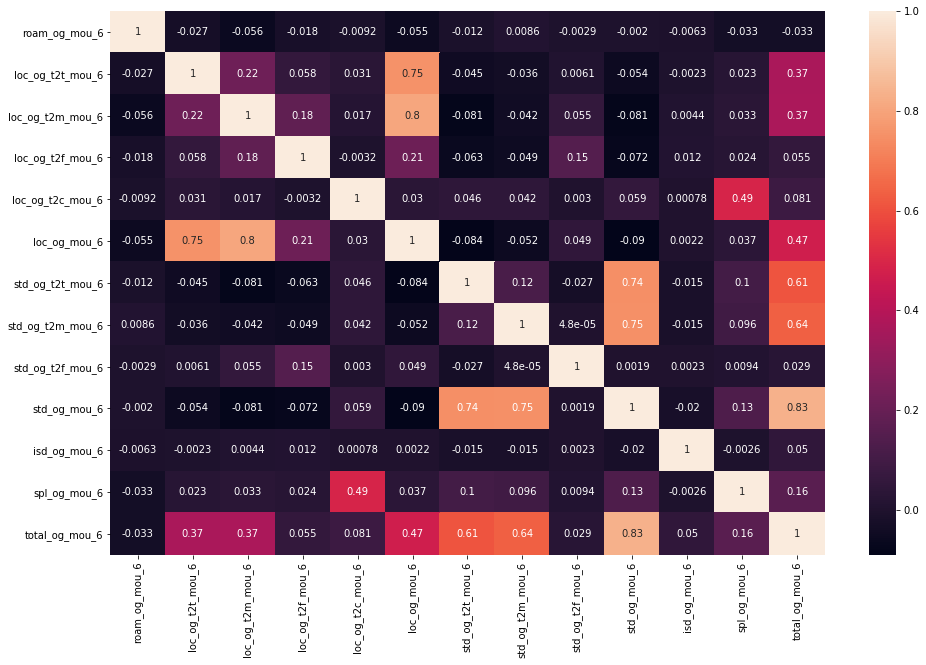

In [56]:
plt.figure(figsize=(16,10))
ax=sns.heatmap(telecom.filter(mou_og_cols6).corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [57]:
cols=['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8',
      'total_og_mou_6','total_og_mou_7','total_og_mou_8']
telecom.drop(cols,axis=1,inplace=True)

In [58]:
mou_ic_cols6 = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_6',regex=True)]

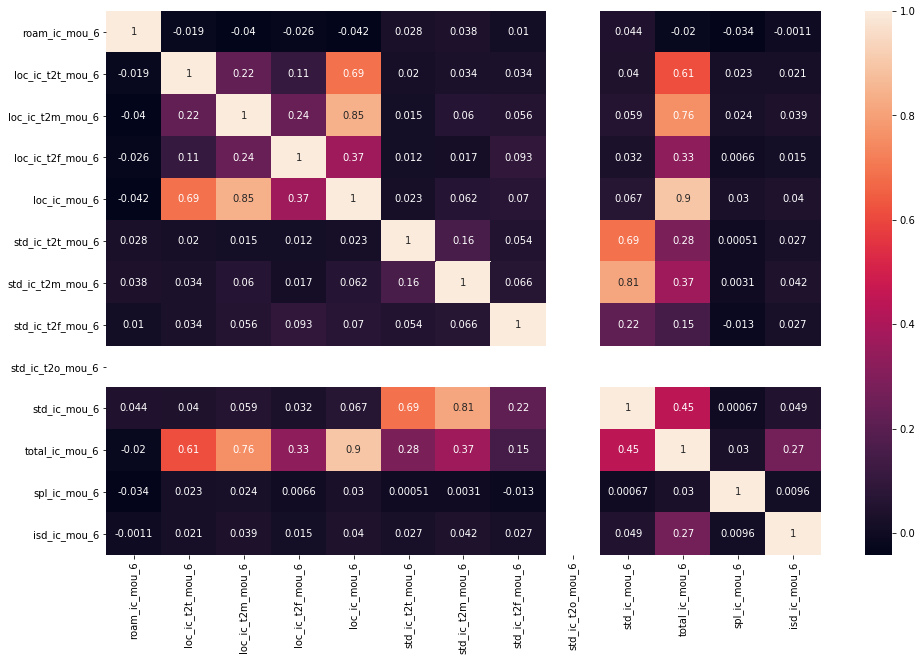

In [59]:
plt.figure(figsize=(16,10))
ax=sns.heatmap(telecom.filter(mou_ic_cols6).corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [60]:
cols=['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
      'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
telecom.drop(cols,axis=1,inplace=True)

In [61]:
telecom.shape

(29953, 124)

In [62]:
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number               0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 0.00
onnet_mou_7                 0.00
onnet_mou_8                 0.00
offnet_mou_6                0.00
offnet_mou_7                0.00
offnet_mou_8                0.00
roam_ic_mou_6               0.00
roam_ic_mou_7               0.00
roam_ic_mou_8               0.00
roam_og_mou_6               0.00
roam_og_mou_7               0.00
roam_og_mou_8               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2t_mou_7            0.00
loc_og_t2t_mou_8            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2m_mou_7            0.00
loc_og_t2m_mou_8            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2f_mou_7            0.00
loc_og_t2f_mou_8            0.00
loc_og_t2c_mou_6            0.00
loc_og_t2c_mou_7            0.00
loc_og_t2c_mou_8            0.00
std_og_t2t_mou_6            0.00
std_og_t2t_mou_7            0.00
std_og_t2t

In [63]:
# Since it a derived column we can dorp it now
telecom.drop('total_avg_rech_amnt_6_7',axis=1,inplace=True)

### Age on network (aon)

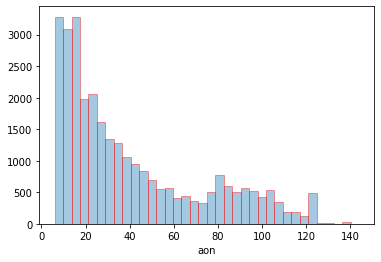

In [64]:
sns.distplot(telecom['aon']/30, hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [66]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data=telecom.copy()
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure']= pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

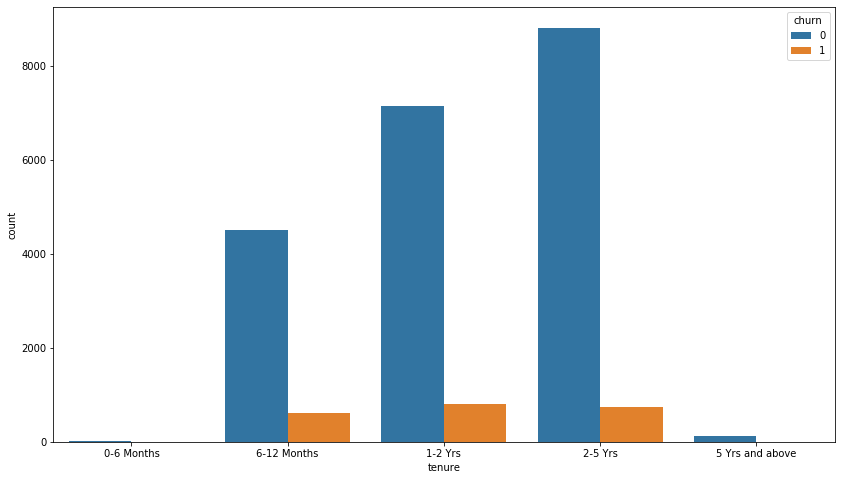

In [67]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_data)
plt.show()

we can see that customers who are more 2-5 years mostly don't churn, So customers who have tenure of less than 5 years has more chance of being churned.

#### Clubbing good phase data by taking average of both months

In [69]:
telecom['arpu_67']=(telecom['arpu_6']+ telecom['arpu_7'])/2

In [70]:
telecom['fb_user_67']=(telecom['fb_user_6']+ telecom['fb_user_7'])/2

In [71]:
telecom['ic_others_67']=(telecom['ic_others_6']+telecom['ic_others_7'])/2

In [72]:
telecom['isd_ic_mou_67'] =(telecom['isd_ic_mou_6']+telecom['isd_ic_mou_7'])/2

In [73]:
telecom['isd_og_mou_67'] =(telecom['isd_og_mou_6'] + telecom['isd_og_mou_7'])/2

In [74]:
telecom['last_day_rch_amt_67']= (telecom['last_day_rch_amt_6'] + telecom['last_day_rch_amt_7'])/2

In [75]:
telecom['loc_ic_t2f_mou_67'] = (telecom['loc_ic_t2f_mou_6'] + telecom['loc_ic_t2f_mou_7'])/2

In [76]:
telecom['loc_ic_t2m_mou_67'] = (telecom['loc_ic_t2m_mou_6'] + telecom['loc_ic_t2m_mou_7'])/2

In [77]:
telecom['loc_ic_t2t_mou_67'] = (telecom['loc_ic_t2t_mou_6'] + telecom['loc_ic_t2t_mou_7'])/2

In [78]:
telecom['loc_og_t2c_mou_67'] =(telecom['loc_og_t2c_mou_6'] + telecom['loc_og_t2c_mou_7'])/2

In [79]:
telecom['loc_og_t2f_mou_67']=(telecom['loc_og_t2f_mou_6'] + telecom['loc_og_t2f_mou_7'])/2

In [80]:
telecom['loc_og_t2m_mou_67']=(telecom['loc_og_t2m_mou_6'] +telecom['loc_og_t2m_mou_7'])/2

In [81]:
telecom['oc_og_t2t_mou_67'] = (telecom['loc_og_t2t_mou_6'] +telecom['loc_og_t2t_mou_7'])/2

In [82]:
telecom['max_rech_amt_67'] = (telecom['max_rech_amt_6'] + telecom['max_rech_amt_7'])/2

In [83]:
telecom['max_rech_data_67'] = (telecom['max_rech_data_6'] + telecom['max_rech_data_7'])/2

In [84]:
telecom['monthly_2g_67'] = (telecom['monthly_2g_6'] + telecom['monthly_2g_7'])/2

In [85]:
telecom['monthly_3g_67'] = (telecom['monthly_3g_6'] + telecom['monthly_3g_7'])/2

In [86]:
telecom['night_pck_user_67'] = (telecom['night_pck_user_6'] + telecom['night_pck_user_7'])/2

In [87]:
telecom['offnet_mou_67'] = (telecom['offnet_mou_6'] + telecom['offnet_mou_7'])/2

In [88]:
telecom['og_others_67'] = (telecom['og_others_6'] + telecom['og_others_7'])/2

In [89]:
telecom['onnet_mou_67'] = (telecom['onnet_mou_6'] + telecom['onnet_mou_7'])/2

In [90]:
telecom['roam_ic_mou_67'] = (telecom['roam_ic_mou_6'] + telecom['roam_ic_mou_7'])/2

In [91]:
telecom['roam_og_mou_67'] = (telecom['roam_og_mou_6'] + telecom['roam_og_mou_7'])/2

In [92]:
telecom['sachet_2g_67'] = (telecom['sachet_2g_6'] + telecom['sachet_2g_7'])/2

In [93]:
telecom['sachet_3g_67'] = (telecom['sachet_3g_6'] + telecom['sachet_3g_7'])/2

In [94]:
telecom['spl_ic_mou_67'] = (telecom['spl_ic_mou_6'] + telecom['spl_ic_mou_7'])/2

In [95]:
telecom['spl_og_mou_67'] = (telecom['spl_og_mou_6'] + telecom['spl_og_mou_7'])/2

In [96]:
telecom['std_ic_t2f_mou_67'] = (telecom['std_ic_t2f_mou_6'] + telecom['std_ic_t2f_mou_7'])/2

In [97]:
telecom['std_ic_t2m_mou_67'] = (telecom['std_ic_t2m_mou_6'] + telecom['std_ic_t2m_mou_7'])/2

In [98]:
telecom['std_ic_t2o_mou_67'] = (telecom['std_ic_t2o_mou_6'] + telecom['std_ic_t2o_mou_7'])/2

In [99]:
telecom['std_ic_t2t_mou_67'] = (telecom['std_ic_t2t_mou_6'] + telecom['std_ic_t2t_mou_7'])/2

In [100]:
telecom['std_og_t2f_mou_67'] = (telecom['std_og_t2f_mou_6'] + telecom['std_og_t2f_mou_7'])/2

In [101]:
telecom['std_og_t2m_mou_67'] = (telecom['std_og_t2m_mou_6'] + telecom['std_og_t2m_mou_7'])/2

In [102]:
telecom['std_og_t2t_mou_67'] = (telecom['std_og_t2t_mou_6'] + telecom['std_og_t2t_mou_7'])/2

In [103]:
telecom['total_rech_amt_67'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [104]:
telecom['total_rech_data_amt_67'] = (telecom['total_rech_data_amt_6'] + telecom['total_rech_data_amt_7'])/2

In [105]:
telecom['total_rech_num_67'] = (telecom['total_rech_num_6'] + telecom['total_rech_num_7'])/2 

In [106]:
telecom['vol_2g_mb_67'] = (telecom['vol_2g_mb_6'] + telecom['vol_2g_mb_7'])/2 

In [107]:
telecom['vol_3g_mb_67'] = (telecom['vol_3g_mb_6'] + telecom['vol_3g_mb_6'])/2 

In [108]:
telecom['good_phase_vbc_3g']= (telecom['jun_vbc_3g']+telecom['jul_vbc_3g'])/2

In [109]:
cols_6=telecom.columns[telecom.columns.str.contains('_6$',regex=True)]

In [110]:
cols_6

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'max_rech_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6', 'total_rech_data_amt_6'],
      dtype='object')

In [111]:
telecom.drop(cols_6,axis=1,inplace=True)

In [112]:
cols_7=telecom.columns[telecom.columns.str.contains('_7$',regex=True)]
print(cols_7)

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7',
       'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'max_rech_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7',
       'night_pck_user_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7',
       'sachet_3g_7', 'fb_user_7', 'total_rech_data_amt_7'],
      dtype='object')


In [113]:
telecom.drop(cols_7,axis=1,inplace=True)

In [114]:
telecom.drop(['jun_vbc_3g','jul_vbc_3g'],axis = 1, inplace=True)

In [115]:
telecom.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  std_ic_t2o_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
0               0.00               0.0           0.0          0.00   
7              22.21               0.0           0.0         31.59   
8               0.00               0.0           0.0          0.00   
21              0.00               0.0           0.0          0.00   
23              0.00               0.0           0.0          3.74   

    ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
0          0.00                 2               252             252   
7         15.14                 7              3638            1580   
8          0.00                14               120              30   
21         0.00                27               718              50   
23        13.06                 4               439             179   

    last_day_rch_amt_8  max_rech_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0                  252            252.0         5.75       109.61   
7                  779              0.0         0.00         0.00   
8                   10             23.0         0.03        11.94   
21                  50              0.0         0.00         0.00   
23                   0            179.0         0.01      1009.92   

    night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0                0.0             0            0             1            0   
7                0.0             0            0             0            0   
8                0.0             0            3             0            0   
21               0.0             0            0             0            0   
23               0.0             0            0             1            1   

    fb_user_8  aon  aug_vbc_3g  total_rech_data_amt_8

In [116]:
telecom.shape

(29953, 83)

In [117]:
dep_var =telecom.drop(['mobile_number','churn'],axis=1)

In [118]:
# Create correlation matrix
dv= dep_var.corr().abs()
dv

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
arpu_8                  1.000000     0.347591      0.524531       0.110835   
onnet_mou_8             0.347591     1.000000      0.130686       0.023052   
offnet_mou_8            0.524531     0.130686      1.000000       0.047580   
roam_ic_mou_8           0.110835     0.023052      0.047580       1.000000   
roam_og_mou_8           0.199129     0.095547      0.131175       0.549658   
loc_og_t2t_mou_8        0.178705     0.475087      0.096349       0.003209   
loc_og_t2m_mou_8        0.352563     0.056305      0.487105       0.038574   
loc_og_t2f_mou_8        0.160123     0.011737      0.115206       0.010980   
loc_og_t2c_mou_8        0.057218     0.068249      0.066841       0.002416   
std_og_t2t_mou_8        0.279608     0.860648      0.090561       0.019585   
std_og_t2m_mou_8        0.324453     0.115356      0.850904       0.014104   
std_og_t2f_mou_8        0.071037     0.014248      0.061319       0.005629   
isd_og_mou_8            0.455144     0.011277      0.081447       0.002875   
spl_og_mou_8            0.108296     0.133322      0.122362       0.023848   
og_others_8             0.011979     0.001831      0.010723       0.000484   
loc_ic_t2t_mou_8        0.106330     0.103939      0.051556       0.004849   
loc_ic_t2m_mou_8        0.204994     0.004266      0.209858       0.039275   
loc_ic_t2f_mou_8        0.078074     0.011879      0.049120       0.020206   
std_ic_t2t_mou_8        0.094258     0.135235      0.036506       0.021920   
std_ic_t2m_mou_8        0.115111     0.026618      0.162348       0.026407   
std_ic_t2f_mou_8        0.037803     0.008297      0.016680       0.000587   
std_ic_t2o_mou_8             NaN          NaN           NaN            NaN   
spl_ic_mou_8            0.021594     0.004157      0.072871       0.021688   
isd_ic_mou_8            0.106135     0.010516      0.024438       0.015111   
ic_others_8             0.024212     0.000268      0.017744       0.006972   
total_rech_num_8        0.357893     0.300435      0.314552       0.000081   
total_rech_amt_8        0.955322     0.335209      0.507093       0.107102   
max_rech_amt_8          0.447672     0.066568      0.166771       0.087610   
last_day_rch_amt_8      0.320687     0.059261      0.141249       0.049481   
max_rech_data_8         0.150956     0.123788      0.102294       0.007019   
vol_2g_mb_8             0.005243     0.066444      0.073061       0.003340   
vol_3g_mb_8             0.188456     0.072860      0.063734       0.005006   
night_pck_user_8        0.028784     0.044116      0.004339       0.002315   
monthly_2g_8            0.013483     0.076720      0.063202       0.014066   
sachet_2g_8             0.074852     0.073320      0.100375       0.034122   
monthly_3g_8            0.223851     0.060462      0.033755       0.016286   
sachet_3g_8             0.045400     0.031327      0.036468       0.017651   
fb_user_8               0.007909     0.176614      0.177888       0.021166   
aon                     0.070668     0.026012      0.018193       0.009429   
aug_vbc_3g              0.146493     0.078504      0.056182       0.013407   
total_rech_data_amt_8   0.204610     0.033579      0.028061       0.018502   
arpu_67                 0.752414     0.250728      0.373854       0.100797   
fb_user_67              0.126938     0.257494      0.266718       0.034985   
ic_others_67            0.023688     0.006729      0.009122       0.003909   
isd_ic_mou_67           0.083682     0.019285      0.005361       0.030979   
isd_og_mou_67           0.425275     0.014284      0.073399       0.001876   
last_day_rch_amt_67     0.317433     0.037562      0.133333       0.061158   
loc_ic_t2f_mou_67       0.057145     0.024628      0.028023       0.001700   
loc_ic_t2m_mou_67       0.148104     0.032781      0.153991       0.001004   
loc_ic_t2t_mou_67       0.063589     0.066349      0.021160       0.001898   
loc_og_t2c_mou_67       0.016216     0.038887   

In [119]:
# Select upper triangle of correlation matrix
upper = dv.where(np.triu(np.ones(dv.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_rech_amt_8',
 'isd_og_mou_67',
 'oc_og_t2t_mou_67',
 'std_og_t2m_mou_67',
 'std_og_t2t_mou_67',
 'total_rech_amt_67']

In [120]:
telecom.drop(to_drop, axis=1,inplace=True)

In [121]:
telecom.shape

(29953, 75)

In [122]:
telecom.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  \
0               0.00              0.00          0.00          0.00   
7               0.00             16.68         10.01          6.50   
8               7.15              0.00          0.00         10.23   
21              0.00              0.00          0.00          0.00   
23             17.71              0.00          0.00         17.71   

    og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0           0.0              0.16              4.13              1.15   
7           0.0             27.31            121.19             39.53   
8           0.0              0.31             15.48              0.00   
21          0.0             19.54            129.16             10.39   
23          0.0             76.64            146.84              0.71   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0               0.00              0.00              0.00               0.0   
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
21              0.18            101.74              0.00               0.0   
23             13.38             43.91              0.00               0.0   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0            0.0          0.00         0.00                 2             252   
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   

    last_day_rch_amt_8  max_rech_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0                  252            252.0         5.75       109.61   
7                  779              0.0         0.00         0.00   
8                   10             23.0         0.03        11.94   
21                  50              0.0         0.00         0.00   
23                   0            179.0         0.01      1009.92   

    night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0                0.0             0            0             1            0   
7                0.0             0            0             0            0   
8                0.0             0            3             0            0   
21               0.0             0            0             0            0   
23               0.0             0            0             1            1   

    fb_user_8  aon  aug_vbc_3g  total_rech_data_amt_8  churn    arpu_67  \
0         1.0  968       30.40                  252.0      1   206.1005   
7         0.0  802       57.74                    NaN      1  1209.5150   
8         1.0  315       21.03                  207.0      0   435.4720   
21        0.0  720        0.00                    NaN      0   556.1030   
23        1.0  604       40.45         

We are left with 75 columns after clubbing good phase i.e. 6th and 7th month data and removing variables with correlation 80% +

### Imputation 

In [123]:
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number              0.00
arpu_8                     0.00
onnet_mou_8                0.00
offnet_mou_8               0.00
roam_ic_mou_8              0.00
roam_og_mou_8              0.00
loc_og_t2t_mou_8           0.00
loc_og_t2m_mou_8           0.00
loc_og_t2f_mou_8           0.00
loc_og_t2c_mou_8           0.00
std_og_t2f_mou_8           0.00
isd_og_mou_8               0.00
spl_og_mou_8               0.00
og_others_8                3.91
loc_ic_t2t_mou_8           0.00
loc_ic_t2m_mou_8           0.00
loc_ic_t2f_mou_8           0.00
std_ic_t2t_mou_8           0.00
std_ic_t2m_mou_8           0.00
std_ic_t2f_mou_8           0.00
std_ic_t2o_mou_8           0.00
spl_ic_mou_8               0.00
isd_ic_mou_8               0.00
ic_others_8                3.91
total_rech_num_8           0.00
max_rech_amt_8             0.00
last_day_rch_amt_8         0.00
max_rech_data_8            0.00
vol_2g_mb_8                0.00
vol_3g_mb_8                0.00
night_pck_user_8           0.00
monthly_

In [124]:
telecom['og_others_8'] = np.where(np.isnan(telecom['og_others_8']),0,telecom['og_others_8'])

In [125]:
telecom['ic_others_8'] = np.where(np.isnan(telecom['ic_others_8']),0,telecom['ic_others_8'])

In [126]:
telecom['total_rech_data_amt_8'] = np.where(np.isnan(telecom['total_rech_data_amt_8']),0,telecom['total_rech_data_amt_8'])

In [127]:
telecom['ic_others_67'] = np.where(np.isnan(telecom['ic_others_67']),0,telecom['ic_others_67'])

In [128]:
telecom['og_others_67'] = np.where(np.isnan(telecom['og_others_67']),0,telecom['og_others_67'])

In [129]:
telecom['total_rech_data_amt_67'] = np.where(np.isnan(telecom['total_rech_data_amt_67']),0,telecom['total_rech_data_amt_67'])

In [130]:
round((telecom.isnull().sum()/telecom.shape[0])*100,2)

mobile_number             0.0
arpu_8                    0.0
onnet_mou_8               0.0
offnet_mou_8              0.0
roam_ic_mou_8             0.0
roam_og_mou_8             0.0
loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_8          0.0
std_og_t2f_mou_8          0.0
isd_og_mou_8              0.0
spl_og_mou_8              0.0
og_others_8               0.0
loc_ic_t2t_mou_8          0.0
loc_ic_t2m_mou_8          0.0
loc_ic_t2f_mou_8          0.0
std_ic_t2t_mou_8          0.0
std_ic_t2m_mou_8          0.0
std_ic_t2f_mou_8          0.0
std_ic_t2o_mou_8          0.0
spl_ic_mou_8              0.0
isd_ic_mou_8              0.0
ic_others_8               0.0
total_rech_num_8          0.0
max_rech_amt_8            0.0
last_day_rch_amt_8        0.0
max_rech_data_8           0.0
vol_2g_mb_8               0.0
vol_3g_mb_8               0.0
night_pck_user_8          0.0
monthly_2g_8              0.0
sachet_2g_8               0.0
monthly_3g

# Modelling 

In [138]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split

### Divide into X and y

In [238]:
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [239]:
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.0   
7              16.68         10.01          6.50          0.0   
8               0.00          0.00         10.23          0.0   
21              0.00          0.00          0.00          0.0   
23              0.00          0.00         17.71          0.0   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
0               0.16              4.13              1.15              0.00   
7              27.31            121.19             39.53             30.39   
8               0.31             15.48              0.00              0.10   
21             19.54            129.16             10.39              0.18   
23             76.64            146.84              0.71             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  spl_ic_mou_8  \
0               0.00              0.00               0.0           0.0   
7             141.33             22.21               0.0           0.0   
8               0.65              0.00               0.0           0.0   
21            101.74              0.00               0.0           0.0   
23             43.91              0.00               0.0           0.0   

    isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.00         0.00                 2             252   
7          31.59        15.14                 7            1580   
8           0.00         0.00                14              30   
21          0.00         0.00                27              50   
23          3.74        13.06                 4             179   

    last_day_rch_amt_8  max_rech_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0                  252            252.0         5.75       109.61   
7                  779              0.0         0.00         0.00   
8                   10             23.0         0.03        11.94   
21                  50              0.0         0.00         0.00   
23                   0            179.0         0.01      1009.92   

    night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0                0.0             0            0             1            0   
7                0.0             0            0             0            0   
8                0.0             0            3             0            0   
21               0.0             0            0             0            0   
23               0.0             0            0             1            1   

    fb_user_8  aon  aug_vbc_3g  total_rech_data_amt_8    arpu_67  fb_user_67  \
0         1.0  968       30.40                  252.0   206.1005         1.0   
7         0.0  802       57.74                    0.0  1209.5150         0.0   
8         1.0  315       21.03                  207.0   435.4720         0.5   
21        0.0  720        0.00                    0.0   556.1030         0.0   
23        1.0  604       40.45                  540.0   134.1235         0.5   

    ic_others_67  isd_ic_

### scaling

In [240]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns=X.columns
X_scaled.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0 -0.587674    -0.510841     -0.695309      -0.168679      -0.189787   
1  5.302613    -0.396856     -0.019115       0.257863       0.173388   
2 -0.739908    -0.434372     -0.412142      -0.168679      -0.189787   
3  0.256647    -0.325248      1.345016      -0.168679      -0.189787   
4 -0.282646    -0.437642     -0.268131      -0.168679      -0.189787   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -0.343476         -0.649478         -0.301900         -0.238110   
1         -0.166450          0.044793          2.425615         -0.238110   
2         -0.288584         -0.433257         -0.301900          0.762241   
3         -0.240899         -0.201077         -0.220941         -0.238110   
4         -0.195895         -0.013904         -0.301900          2.239684   

   std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0         -0.145041     -0.043625     -0.322777     -0.01739   
1          1.379645      0.180077     -0.002416     -0.01739   
2         -0.145041     -0.043625      0.181421     -0.01739   
3         -0.145041     -0.043625     -0.322777     -0.01739   
4         -0.145041     -0.043625      0.550083     -0.01739   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
0         -0.393039         -0.661296         -0.306103         -0.194993   
1         -0.222309         -0.116813          0.579561          0.230718   
2         -0.392096         -0.608504         -0.332641         -0.193592   
3         -0.271170         -0.079742         -0.092879         -0.192471   
4          0.087897          0.002494         -0.316256         -0.007562   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  spl_ic_mou_8  \
0         -0.270094         -0.128812               0.0     -0.239999   
1          1.097095          0.986581               0.0     -0.239999   
2         -0.263806         -0.128812               0.0     -0.239999   
3          0.714112         -0.128812               0.0     -0.239999   
4          0.154680         -0.128812               0.0     -0.239999   

   isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0     -0.155900    -0.095845         -0.859812        0.529591   
1      0.291204     1.087598         -0.320785        8.192812   
2     -0.155900    -0.095845          0.433852       -0.751459   
3     -0.155900    -0.095845          1.835322       -0.636049   
4     -0.102967     0.925012         -0.644201        0.108345   

   last_day_rch_amt_8  max_rech_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0            1.098537         1.622450    -0.319829    -0.263422   
1            4.726892        -0.655815    -0.338197    -0.382626   
2           -0.567614        -0.447878    -0.338101    -0.369641   
3           -0.292217        -0.655815    -0.338197    -0.382626   
4           -0.636463         0.962476    -0.338165     0.715694   

   night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0         -0.107311     -0.377738    -0.416099      1.276531    -0.183926   
1         -0.107311     -0.377738    -0.416099     -0.341921    -0.183926   
2         -0.107311     -0.377738     0.766276     -0.341921    -0.183926   
3         -0.107311     -0.377738    -0.416099     -0.341921    -0.183926   
4         -0.107311     -0.377738    -0.416099      1.276531     0.724573   

   fb_user_8       aon  aug_vbc_3g  total_rech_data_amt_8   arpu_67  \
0   1.046449 -0.252008   -0.329779              -0.130336 -0.822740   
1  -0.955613 -0.425388   -0.264857              -0.285526  1.510046   
2   1.046449 -0.934039   -0.352029              -0.158048 -0.289486   
3  -0.955613 -0.511034   -0.401967              -0.285526 -0.009037   
4   1.046449 -0.632191   -0.305914               0.047025 -0.990075   

   fb_user_67  ic_others_67  isd_ic_mou_67  last_day_rch_amt_67  \
0    1.044020     -0.096350      -0.154826             1.30

In [241]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

### percentage distribution of churn / Non - churn

In [242]:
churn = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

8.122725603445398

# PCA

In [243]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [244]:
pca.components_

array([[ 4.69054945e-02, -9.26897297e-02, -7.96677456e-02, ...,
         9.00284548e-02,  2.50215942e-01,  2.56208316e-01],
       [ 2.77465189e-01,  1.02236059e-01,  2.24892973e-01, ...,
        -1.16021951e-01,  4.06188120e-04,  2.43010855e-02],
       [ 2.25197350e-01,  1.32356526e-01,  1.72104901e-01, ...,
         3.43355201e-02,  5.47442345e-02,  1.40744747e-02],
       ...,
       [ 4.49545549e-01, -2.35366829e-01, -2.76976861e-01, ...,
         4.09374999e-03,  2.68121549e-03, -2.50509559e-03],
       [ 1.04428121e-18,  2.75479672e-17,  1.55557351e-16, ...,
        -2.61007200e-17, -2.57249278e-16, -2.49198124e-17],
       [-0.00000000e+00, -4.41783525e-17,  4.31426121e-17, ...,
        -4.68283933e-17, -3.27260242e-17,  1.89922842e-17]])

In [245]:
pca.explained_variance_ratio_

array([9.53309174e-02, 8.38558838e-02, 5.56679785e-02, 4.56190662e-02,
       3.63514008e-02, 3.46778148e-02, 3.40804378e-02, 3.15018338e-02,
       3.01822436e-02, 2.96732196e-02, 2.79917927e-02, 2.65715376e-02,
       2.37374130e-02, 2.22333302e-02, 2.19439713e-02, 1.96312530e-02,
       1.84918594e-02, 1.73728855e-02, 1.72099834e-02, 1.58215682e-02,
       1.54195022e-02, 1.45893076e-02, 1.42860951e-02, 1.38330579e-02,
       1.28518578e-02, 1.21830515e-02, 1.19440248e-02, 1.13570775e-02,
       1.09148335e-02, 1.06906479e-02, 1.02762429e-02, 1.00686977e-02,
       9.94329158e-03, 9.11554390e-03, 8.72986682e-03, 8.27531590e-03,
       7.82555999e-03, 7.37741782e-03, 7.05442348e-03, 6.65684484e-03,
       6.25868581e-03, 5.67596283e-03, 5.04009981e-03, 4.89532550e-03,
       4.74986262e-03, 4.37208192e-03, 4.21699141e-03, 3.86358541e-03,
       3.80986275e-03, 3.77199876e-03, 3.58867678e-03, 3.54035095e-03,
       3.41157107e-03, 3.37176431e-03, 3.25850682e-03, 3.20088291e-03,
      

In [246]:
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var_cumu

array([  9.53,  17.92,  23.49,  28.05,  31.69,  35.16,  38.57,  41.72,
        44.74,  47.71,  50.51,  53.17,  55.54,  57.76,  59.95,  61.91,
        63.76,  65.5 ,  67.22,  68.8 ,  70.34,  71.8 ,  73.23,  74.61,
        75.9 ,  77.12,  78.31,  79.45,  80.54,  81.61,  82.64,  83.65,
        84.64,  85.55,  86.42,  87.25,  88.03,  88.77,  89.48,  90.15,
        90.78,  91.35,  91.85,  92.34,  92.81,  93.25,  93.67,  94.06,
        94.44,  94.82,  95.18,  95.53,  95.87,  96.21,  96.54,  96.86,
        97.17,  97.47,  97.75,  98.03,  98.3 ,  98.55,  98.79,  99.02,
        99.22,  99.41,  99.58,  99.72,  99.84,  99.94, 100.03, 100.03,
       100.03])

### 95% of variance is able to explained using 60 variables so we will proceed with 60 variables.

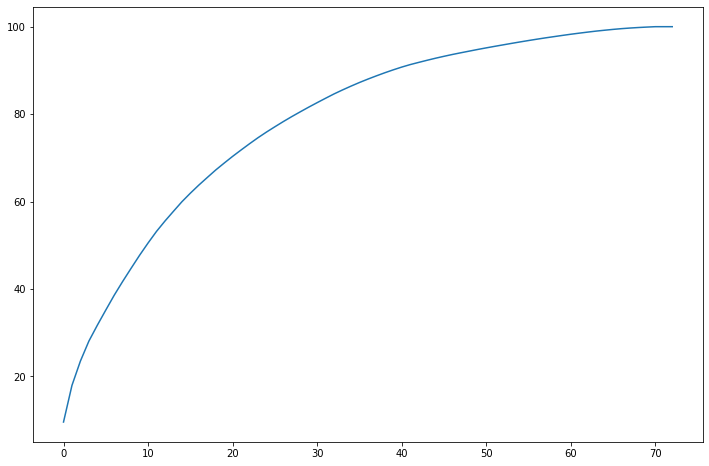

In [247]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

# Data Balancing using SMOTE

In [248]:
smote = SMOTE(random_state = 2) 
x_train_res,y_train_res = smote.fit_sample(X_train,y_train) 
print("Shape of train datatset after SMOTE : "+str(x_train_res.shape))

Shape of train datatset after SMOTE : (38430, 73)


In [249]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (38430, 73)
After OverSampling, the shape of train_y: (38430,) 

After OverSampling, counts of label '1': 19215
After OverSampling, counts of label '0': 19215


In [264]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
x_train_pca = pca_final.fit_transform(x_train_res)
x_train_pca.shape

(38430, 60)

In [265]:
# pca on test scaled data
x_test_pca = pca_final.transform(X_test)
x_test_pca.shape

(8986, 60)

# Logistic Regression

In [263]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train_pca,y_train_res)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_pca)

### Accuracy of Logistic Regression model

In [262]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

# xgboost

In [270]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [273]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(x_train_pca, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [274]:
y_pred = model.predict(x_test_pca)

In [276]:
accuracy = round(accuracy_score(y_test,y_pred),2)
accuracy

0.91

# XGBoost with Hyperparameter

In [277]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)   

In [279]:
model_cv.fit(x_train_pca, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.1min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [280]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [282]:
print('We can get accuracy of '+str(round(model_cv.best_score_,2))+' using '+str(model_cv.best_params_))

We can get accuracy of 0.88 using {'learning_rate': 0.3, 'subsample': 0.4}


In [283]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.4,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(x_train_pca, y_train_res)

[01:08:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.4},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [284]:
# predict
y_pred = model.predict(x_test_pca)

In [285]:
accuracy = round(accuracy_score(y_test,y_pred),2)
accuracy

0.86

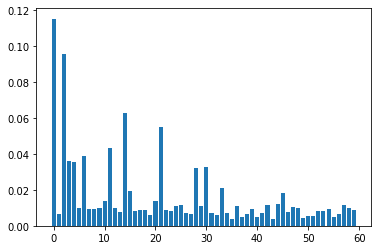

In [286]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

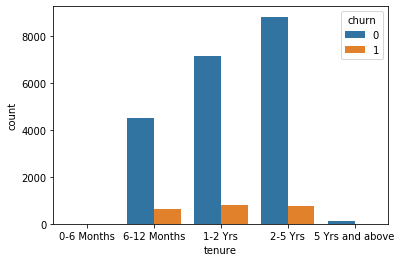

PC1       PC2       PC3           Feature
0   0.046905  0.277465  0.225197            arpu_8
1  -0.092690  0.102236  0.132357       onnet_mou_8
2  -0.079668  0.224893  0.172105      offnet_mou_8
3  -0.003370  0.062993  0.015307     roam_ic_mou_8
4  -0.020192  0.067059  0.036077     roam_og_mou_8
5  -0.015321  0.108472  0.065839  loc_og_t2t_mou_8
6  -0.011193  0.238376  0.074675  loc_og_t2m_mou_8
7   0.031491  0.160608 -0.054126  loc_og_t2f_mou_8
8  -0.019066  0.012844  0.158027  loc_og_t2c_mou_8
9   0.017169  0.088731 -0.048399  std_og_t2f_mou_8
10  0.013046  0.104003  0.088384      isd_og_mou_8
11 -0.034226  0.025689  0.193440      spl_og_mou_8
12 -0.002467  0.003958  0.006049       og_others_8
13  0.010449  0.090767  0.035290  loc_ic_t2t_mou_8
14  0.020648  0.180630  0.049816  loc_ic_t2m_mou_8

In [289]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_data)
plt.show()


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

# Recommendations

XGBoost also produce apt accuracy of 0.91 (default overfit model) and 0.86 with tuned hyperparameters.

Less number of high value customer are churing but for last 6 month no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

Average revenue per user (arpu) seems to be most important feature in determining churn prediction.

Incoming (roam_ic_mou_8) and Outgoing Calls(roam_og_mou_8) on romaing for 8th month are strong indicators of churn behaviour.

Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

# Thank you for Reading